# 4.1: Bayesian Inference: The biased coin problem #

<!--<badge>--><a href="https://colab.research.google.com/github/anu-ilab/JupyterPracticals/blob/main/Solutions/S4.1 - Bayesian Inference of a biased coin-solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

In this practical, we will perform Bayesian inference for a single parameter, constrained by some obervational data, and examine how the posterior knowledge of the parameter changes as we collect new data.

If $\alpha$ is the probability that a head will occur when a coin is tossed, then a biased  coin is described by a value $\alpha \ne 0.5$. We have $0\le \alpha \le 1$, where a value of $\alpha=1$ means a head will always be the result of a coin toss and if $\alpha=0$ a tail will always result.
 
As in every Python program, we need to begin by loading some libraries. For Jupyter we also need the `%matplotlib inline` command, which ensures that figures are rendered properly within the Notebook. This could be omitted if you wanted to reproduce this practical as a 'standard' Python program.



In [9]:
# -------------------------------------------------------- #
#                                                          #
#     Uncomment below to set up environment on "colab"     #
#                                                          #
# -------------------------------------------------------- #

# !pip install -U anu-inversion-course
# !git clone https://github.com/anu-ilab/JupyterPracticals
# %cd JupyterPracticals/Solutions

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Now we read in the coin toss data as ones for heads and zeros for tails.

In [11]:
#initialise the list of coin flip results
tosses = open('../datasets/coin_data1-numeric.txt','r')
tosses = tosses.readlines()
tosses = np.array([int(flip) for flip in tosses])

In [12]:
print (' Number of tosses', len(tosses))
tosses[0:100]

 Number of tosses 1024


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0])

The Binomial theorem tells us the probability that there are $R$ heads in $N$ coin tosses for a coin where the the probability of a head is $\alpha$ is given by

\begin{equation*}
p(R|\alpha,N) = \frac{N!}{R!(N-R)!} \alpha^R (1-\alpha)^{N-R}
\end{equation*}

**Task 1:** Decide on an appropriate Likelihood function to use the observed value of $R$ to constrain the unknown $\alpha$ and write it down, $p(R | \alpha)$. Assuming we have no particular prior preference for $\alpha$ decide on a prior PDF, $p(\alpha)$. From these determine the form of the posterior PDF, $p(\alpha | R)$ and write these down. Remember you only need to know the posterior PDF up to a multiplicative constant, ignoring normalization terms that do not depend on $\alpha$.

**Task 2:** Use the coin toss data to calculate the poster PDF, $p(\alpha | R(N))$ for $N=1, 2, 3, 4, 8, 64, 1024$, and plot the PDF for each case. What do you conclude about the true value of $\alpha$?

Hint: In any computer program it is always best to calculate log p(njd)
first and then take an exponent to evaluate the curve as a function
of n. Stirling’s formulae for the approximation to n! may be useful.

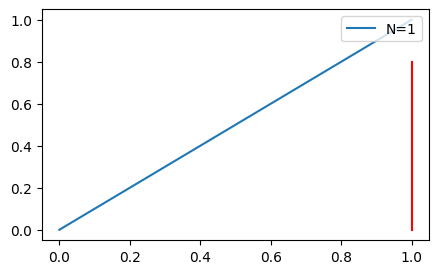

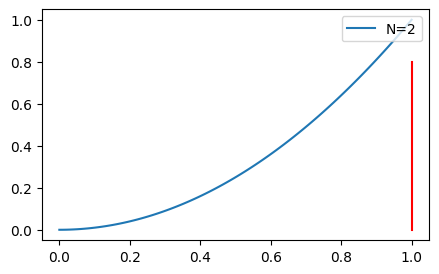

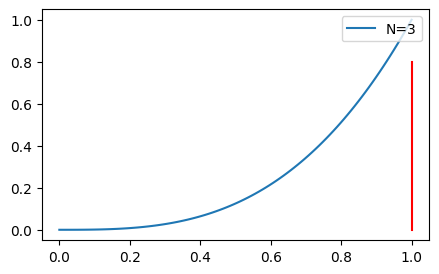

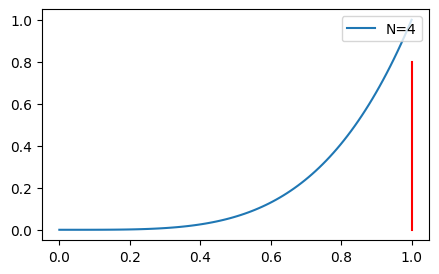

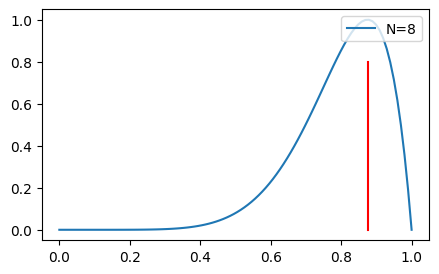

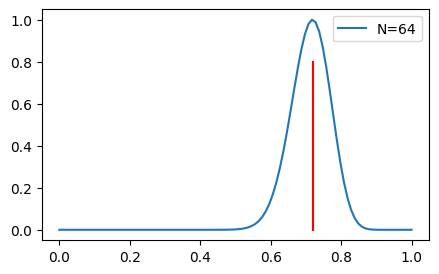

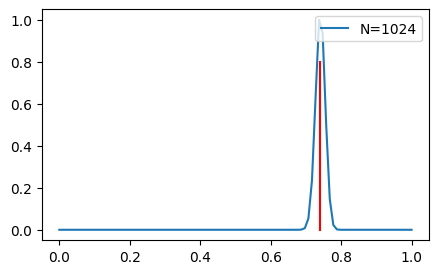

In [13]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 
#
#In any computer program it is always best to calculate log p(njd)
#first and then take an exponent to evaluate the curve as a function
#of n. Stirling’s formulae for the approximation to n! may be useful.

n = [1,2,3,4,8,64,1024]
for i in range(len(n)):
    plt.figure(figsize=[5,3])
    r = np.sum(tosses[:n[i]])
    alpha = np.linspace(0,1,100)
    p = (alpha**r)*(1-alpha)**(n[i]-r)
    plt.plot([r/n[i],r/n[i]],[0.0,0.8],'r-')
    p = p/np.max(p)
    plt.plot(alpha,p,label='N='+str(n[i]))
    plt.legend(loc=1)

**Task 3:** Now calculate an estimate of $\alpha$ for each case using a Frequentist approach. Decide on what a good estimator of $\alpha$ would be given $R$ and $N$. Calculate this estimator for each case and place on the same figure. How well does it compare to the Posterior PDF?

In [14]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 
#


**Task 4:** More formally a good Frequentist estimator is the maximum of the Likelihood. You can get an expression of the maximum Likelihood value for $\alpha$, by finding $\alpha$ such that $\frac{d L_o}{d\alpha} = 0$, where $L$ is your Likelihood expression. Try and differentiate your expression for the Likelihood and solve this equation for $\alpha$. How does this expression compare to your estimator you produced in Task 3.

Theory tells us that an estimated error in the Frequentist estimator is given by $\sigma = \left( \frac{d^2 L_o}{d \alpha^2}\right)^{-1/2}$, where $L_o = -\log L$, the negative log-Likelihood. Calculate this error estimate for the Frequentist estimator and put on the figures above. How does the estimator and its error compare to the Posterior PDF for each case?

For 
\begin{equation*}
L = p(R|\alpha,N) = \frac{N!}{R!(N-R)!} \alpha^R (1-\alpha)^{N-R}
\end{equation*}

we have
\begin{equation*}
L_o = -\log L = -\log\left[ \frac{N!}{R!(N-R)!}\right] - R\log \alpha - (N-R)\log (1-\alpha)
\end{equation*}
which gives
\begin{equation*}
\frac{d L_o}{d\alpha} = -\frac{R}{\alpha} + \frac{(N-R)}{(1-\alpha)} = 0
\end{equation*}

\begin{equation}
\Rightarrow \quad \alpha = \frac{R}{N}
\end{equation}

This is the estimator that maximizes the Likelihood, with error $\sigma$, where
\begin{equation*}
\sigma = \left( \frac{d^2 L_o}{d \alpha^2}\right)^{-1/2}
\end{equation*}

and so

\begin{equation*}
\sigma^{-2} =  \frac{d^2 L_o}{d \alpha^2} = \frac{d}{d \alpha} \left( -\frac{R}{\alpha} + \frac{(N-R)}{(1-\alpha)}  \right)
\end{equation*}

which gives

\begin{equation*}
\sigma =  \frac{\alpha(1-\alpha)}{(N\alpha^2 - 2R\alpha + R)^{1/2}}
\end{equation*}

This allows us to plot the estimator $\alpha = R/N$ together with its error $\sigma$, which is done in teh plot below for differing cases of $R$ and $N$.

/var/folders/4c/h8hvkbn17rb36dsylqf_wp44jk123f/T/ipykernel_92204/248201290.py:15: RuntimeWarning: invalid value encountered in double_scalars
  sigma = freq*(1-freq)/np.sqrt(n[i]*freq**2-2.*freq*r+r)


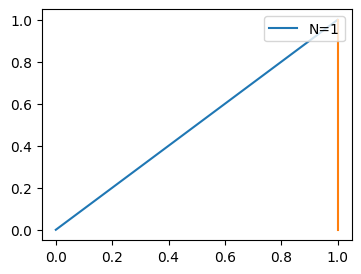

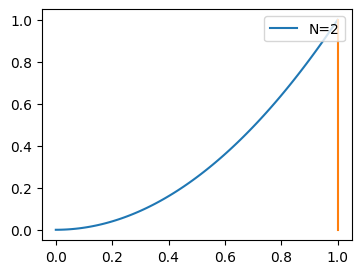

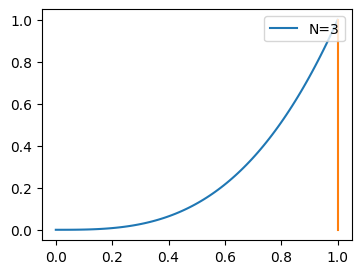

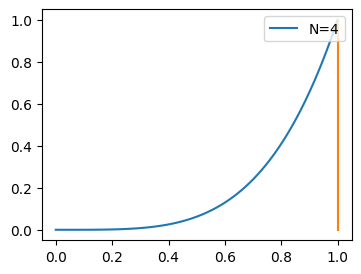

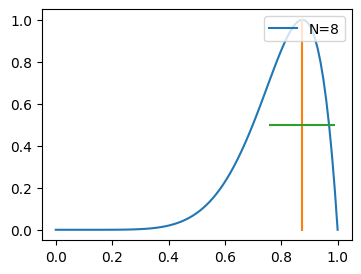

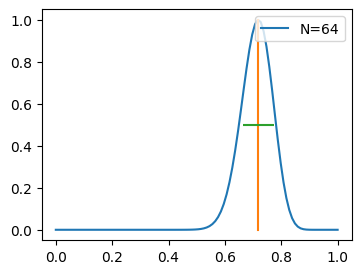

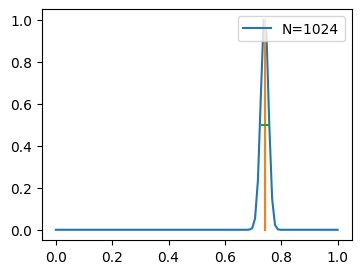

In [15]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 
#
n = [1,2,3,4,8,64,1024]
for i in range(len(n)):
    plt.figure(figsize=[4,3])
    r = np.sum(tosses[:n[i]])
    alpha = np.linspace(0,1,100)
    p = alpha**r*(1-alpha)**(n[i]-r)
    p = p/np.max(p)
    freq= float(r)/n[i]
    plt.plot(alpha,p,label='N='+str(n[i]))
    plt.plot([freq,freq],[0,1])
    plt.legend(loc=1)
    sigma = freq*(1-freq)/np.sqrt(n[i]*freq**2-2.*freq*r+r)
    plt.errorbar(freq, 0.5,xerr=sigma)

**Task 5:** Repeat the above steps for the second data set. Do you notice a difference in the rate of convergence of the posterior PDF to the true solution? Why would this be?

/var/folders/4c/h8hvkbn17rb36dsylqf_wp44jk123f/T/ipykernel_92204/1259161819.py:20: RuntimeWarning: invalid value encountered in double_scalars
  sigma = freq*(1-freq)/np.sqrt(n[i]*freq**2-2.*freq*r+r)


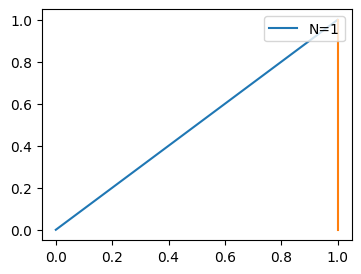

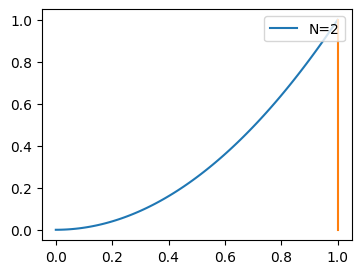

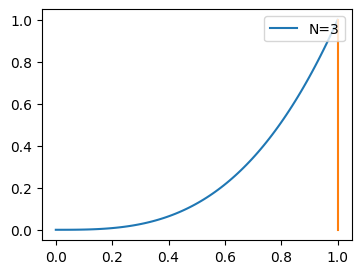

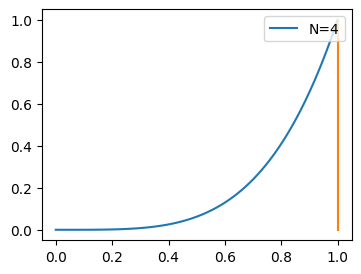

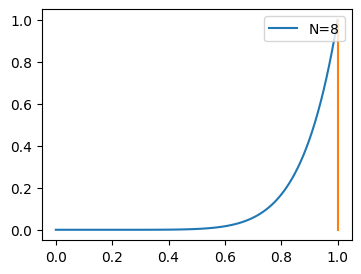

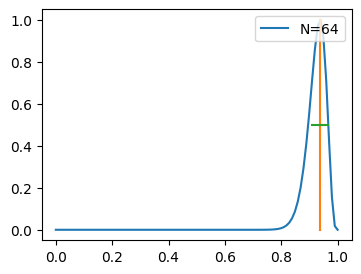

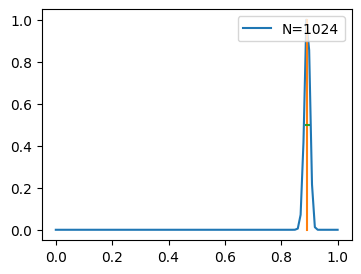

In [16]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 
#
#initialise the list of coin flip results
tosses = open('../datasets/coin_data2-numeric.txt','r')
tosses = tosses.readlines()
tosses = np.array([int(flip) for flip in tosses])

n = [1,2,3,4,8,64,1024]
for i in range(len(n)):
    plt.figure(figsize=[4,3])
    r = np.sum(tosses[:n[i]])
    alpha = np.linspace(0,1,100)
    p = alpha**r*(1-alpha)**(n[i]-r)
    p = p/np.max(p)
    freq= float(r)/n[i]
    plt.plot(alpha,p,label='N='+str(n[i]))
    plt.plot([freq,freq],[0,1])
    plt.legend(loc=1)
    sigma = freq*(1-freq)/np.sqrt(n[i]*freq**2-2.*freq*r+r)
    plt.errorbar(freq, 0.5,xerr=sigma)

----